In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "data/dogscats/"
#PATH = "data/competitions/dogs-vs-cats-redux-kernels-edition/"
sz=224

In [4]:
!ls {PATH}train


cats  dogs


In [5]:
print(torch.cuda.is_available(), torch.backends.cudnn.enabled)

True True


In [5]:
imgs = os.listdir(f'{PATH}/train')

In [125]:
arch=resnet34
tfms_data=tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data=ImageClassifierData.from_paths(PATH,tfms=tfms_data)
learn=ConvLearner.pretrained(arch, data, precompute=True)

In [ ]:
data=ImageClassifierData.from_csv()

In [7]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 84%|████████▍ | 303/360 [00:06<00:01, 48.71it/s, loss=0.555]


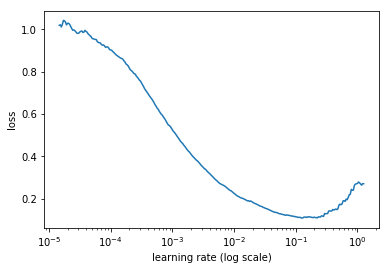

In [8]:
learn.sched.plot()

In [126]:
learn.fit(1e-2, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.057418   0.027103   0.98877   
    1      0.03946    0.024461   0.990234                     
    2      0.040487   0.024797   0.990234                     



[0.02479706, 0.990234375]

In [21]:
learn

Sequential(
  (0): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True)
  (1): Dropout(p=0.25)
  (2): Linear(in_features=1024, out_features=512)
  (3): ReLU()
  (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=512, out_features=2)
  (7): LogSoftmax()
)

In [127]:
learn.save('base')

In [128]:
learn.load('base')

In [129]:
learn.precompute = False
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.049309   0.027379   0.990723  
    1      0.041411   0.024205   0.992188                     
    2      0.039847   0.025702   0.991211                     



[0.025702303, 0.9912109375]

In [12]:
learn.unfreeze()

In [33]:
learn.save('224_aug_3')

In [31]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 67%|██████▋   | 242/360 [02:07<01:02,  1.89it/s, loss=0.246] 

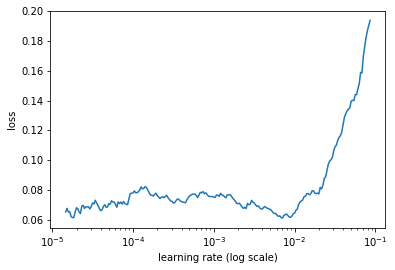

In [32]:
learn.sched.plot()

In [36]:
lrs = np.array([1e-4, 1e-3, 1e-2])
learn.lr_find(lrs/1000)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  4%|▍         | 16/360 [00:09<03:16,  1.75it/s, loss=0.0891]

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 78%|███████▊  | 281/360 [02:27<00:41,  1.91it/s, loss=0.26]  


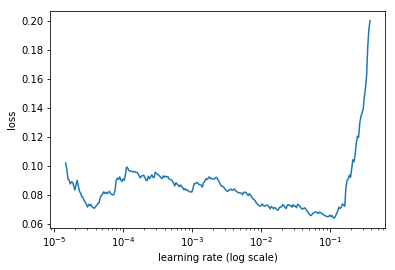

In [37]:
learn.sched.plot()

In [40]:
lrs = [1e-4,9e-4,7e-3]
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.055414   0.02528    0.990723  
    1      0.035687   0.019466   0.992188                     
    2      0.031353   0.019784   0.992188                     
    3      0.03072    0.020443   0.991699                     
    4      0.021517   0.021012   0.992676                     
    5      0.021789   0.020094   0.993652                     
    6      0.019403   0.019352   0.993652                     



[0.019352309, 0.99365234375]

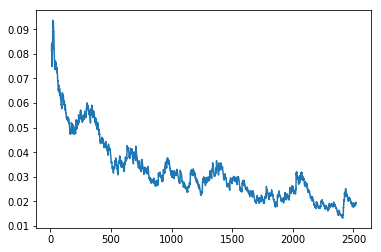

In [43]:
learn.sched.plot_loss()

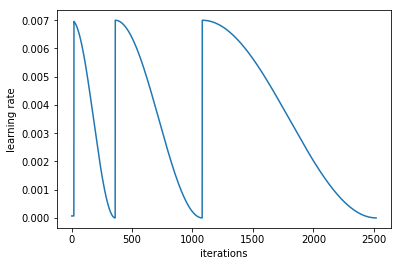

In [44]:
learn.sched.plot_lr()

In [45]:
learn.save('224_fulltrained')

In [13]:
learn.load('224_fulltrained')

In [70]:
data2=ImageClassifierData.from_paths(PATH,tfms=tfms_data,test_name='test')
learn.set_data(data2)

In [97]:
data = data2

In [84]:
data2.test_ds.fnames
None

In [14]:
log_preds,y_preds = learn.TTA()

In [28]:
learn.precompute

False

In [30]:
??tfms_from_model

In [166]:
data.val_ds[1][0]

array([[[ 0.64248,  0.6344 ,  0.22726, ..., -0.39439, -0.41568, -0.35161],
        [ 0.49306,  0.56488,  0.52761, ..., -0.45153, -0.53982, -0.55847],
        [ 0.55676,  0.58713,  0.61823, ..., -0.35458, -0.44037, -0.46489],
        ...,
        [ 0.88843,  0.95698,  0.97477, ...,  0.46091,  0.20464,  0.18309],
        [ 0.64305,  0.80162,  0.93361, ...,  0.78473,  0.74823,  0.75427],
        [ 1.05106,  1.1199 ,  1.15627, ...,  0.94318,  1.04114,  1.06089]],

       [[ 0.62872,  0.62046,  0.20424, ..., -0.43129, -0.41896, -0.36887],
        [ 0.44923,  0.52265,  0.48455, ..., -0.48971, -0.55722, -0.61275],
        [ 0.49214,  0.5254 ,  0.56656, ..., -0.39059, -0.45555, -0.51708],
        ...,
        [ 0.42498,  0.50643,  0.56432, ...,  0.14746, -0.0815 , -0.06238],
        [ 0.17413,  0.34761,  0.52224, ...,  0.51154,  0.48326,  0.52714],
        [ 0.59125,  0.67299,  0.74987, ...,  0.71811,  0.82365,  0.84639]],

       [[ 0.58671,  0.57849,  0.16411, ..., -0.36402, -0.36871, -0.331

data/dogscats/valid/dogs/dog.8088.jpg


array([0.00072, 0.99928], dtype=float32)

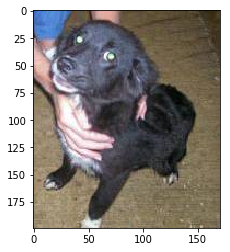

In [185]:
def predictByFile(fileName):
    
    _, val_tfms = tfms_from_model(arch, sz)
    source_img = open_image(fileName)  
    print(fileName)
    plt.imshow(source_img)
    img = val_tfms(source_img)
    preds = learn.predict_array(img[None])
    #print(img)
    return np.exp(preds[0])
fileName = data.val_ds.fnames[1170]
predictByFile(PATH+fileName)

data/serdit.jpg


array([0.99994, 0.00006], dtype=float32)

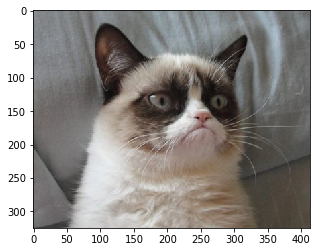

In [198]:
predictByFile('data/serdit.jpg')

In [21]:
y_preds

array([0, 0, 0, ..., 1, 1, 1])

In [107]:
probs = np.mean(np.exp(all_log_preds),0)[:,1]
probs

NameError: name 'all_log_preds' is not defined

In [173]:
probs = np.exp(log_preds[:,1])
preds = np.argmax(log_preds, axis=1)

In [113]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_y(y): return rand_by_mask(preds == y)
def plot_test_with_title(idxs, title):
    imgs = np.stack([data.test_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.test_ds.denorm(imgs), rows=1, titles=title_probs)

In [114]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [106]:
plot_test_with_title(rand_by_y(1), "Random dogs")

NameError: name 'plot_test_with_title' is not defined

Random cats


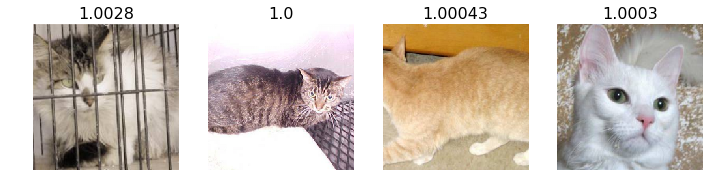

In [177]:
plot_test_with_title(rand_by_y(0), "Random cats")

In [120]:
import pandas as pd

In [153]:
def extract_number(fname): return re.search('test/(\d*).jpg', fname).group(1)
numbers = [int(extract_number(fname)) for fname in data.test_ds.fnames]

In [182]:
df = pd.DataFrame({'id': numbers, 'label': probs})
data_path = 'data/competitions/dogs-vs-cats-redux-kernels-edition'
df.to_csv(f'{data_path}/tta_sumbmission.csv',index=False,float_format='%.10f')